In [1]:
## import the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,SpatialDropout2D,Dropout,MaxPool2D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras_tuner as kt
import os
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input

In [2]:
labels = ['Rugby', 'Soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train_path='Data/Train/'
val_path='Data/Val/'
classes=['Rugby','Soccer']

In [4]:
train=get_data(train_path)
val=get_data(val_path)

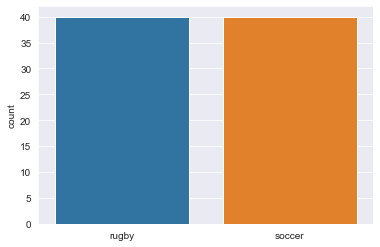

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("rugby")
    else:
        l.append("soccer")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Rugby')

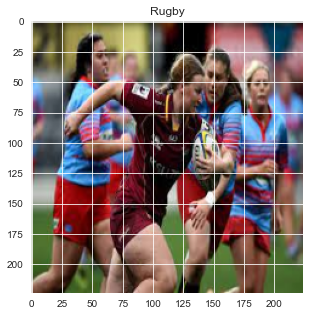

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Soccer')

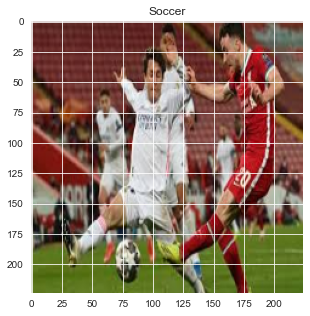

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [63]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape((-1,x_train.shape[0],x_train.shape[1],x_train.shape[2]))
y_train = np.array(y_train)

x_val.reshape((-1,x_val.shape[0],x_val.shape[1],x_val.shape[2]))
y_val = np.array(y_val)

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False,
        preprocessing_function=preprocess_input)  # randomly flip images


datagen.fit(x_train)

In [10]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [11]:
base_model.trainable=False 

In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [58]:
model=Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [59]:
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])

In [68]:
history = model.fit(x_train,y_train,epochs=10 , validation_data = (x_val, y_val))

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

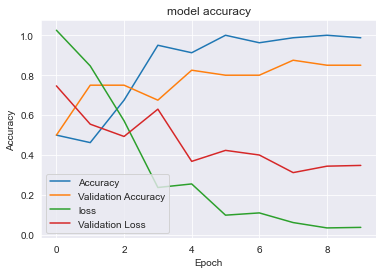

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [22]:
from keras.models import save_model,load_model

In [23]:
save_model(model,'model.h5')

In [24]:
m=load_model('model.h5')

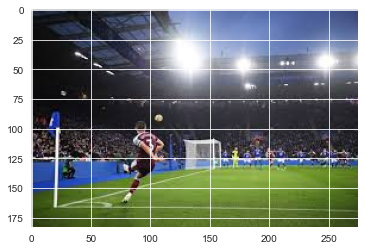

In [39]:
img=cv2.imread('images (58).jpg',)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [40]:
img=cv2.resize(img,(224,224))

In [41]:
img=np.array(img)

In [42]:
img=img.reshape((-1,img.shape[0],img.shape[1],img.shape[2]))

In [43]:
y=m.predict(img)

In [44]:
y

array([[1.]], dtype=float32)

In [96]:
img=cv2.imread("th (1).jpg")

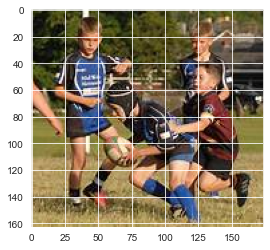

In [97]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img=cv2.resize(img,(224,224))
img=np.array(img)
img=img.reshape((-1,img.shape[0],img.shape[1],img.shape[2]))

In [98]:
y=m.predict(img)
if (int(y))==0:
    print("Rugby")
else:
    print("Soccer")

Rugby


In [86]:
y

array([[1.]], dtype=float32)